In [1]:
from models.regressionnet_resnet import *
from scripts import tools
from scripts import dataset
from scripts.config import *
import cv2

tools.etc.set_GPU("1")

In [2]:
net = Regressionnet(data_shape=(128,128,3),num_joints=14,gpu_memory_fraction=None, phase='inference')  

with net.graph.as_default():
    saver = tf.train.Saver()
    saver.restore(net.sess, "./snapshots/Human_Joint_Pointer/Regressionnet_highest_pcp.ckpt")
    
    test_it = dataset.met("./dataset/MET7/met7_test.csv", Bbox=True, Bbox_mode='apply', scale_set=[4.0],
                          re_img_size=(128,128), dataset_root="./dataset/MET7/", Shuffle=False, normalize=True)
    
orig_img_set = dataset.met("./dataset/MET7/met7_test.csv", Bbox=True, Bbox_mode='apply', scale_set=[4.0],
                           re_img_size=(128,128), dataset_root="./dataset/MET7/", Shuffle=False, normalize=False).img_set

INFO:tensorflow:Restoring parameters from ./snapshots/Human_Joint_Pointer/Regressionnet_highest_pcp.ckpt


[ {{BBOX}} Applying Images & Coordinates]: 100%|██████████| 174/174 [00:00<00:00, 4542.14it/s]


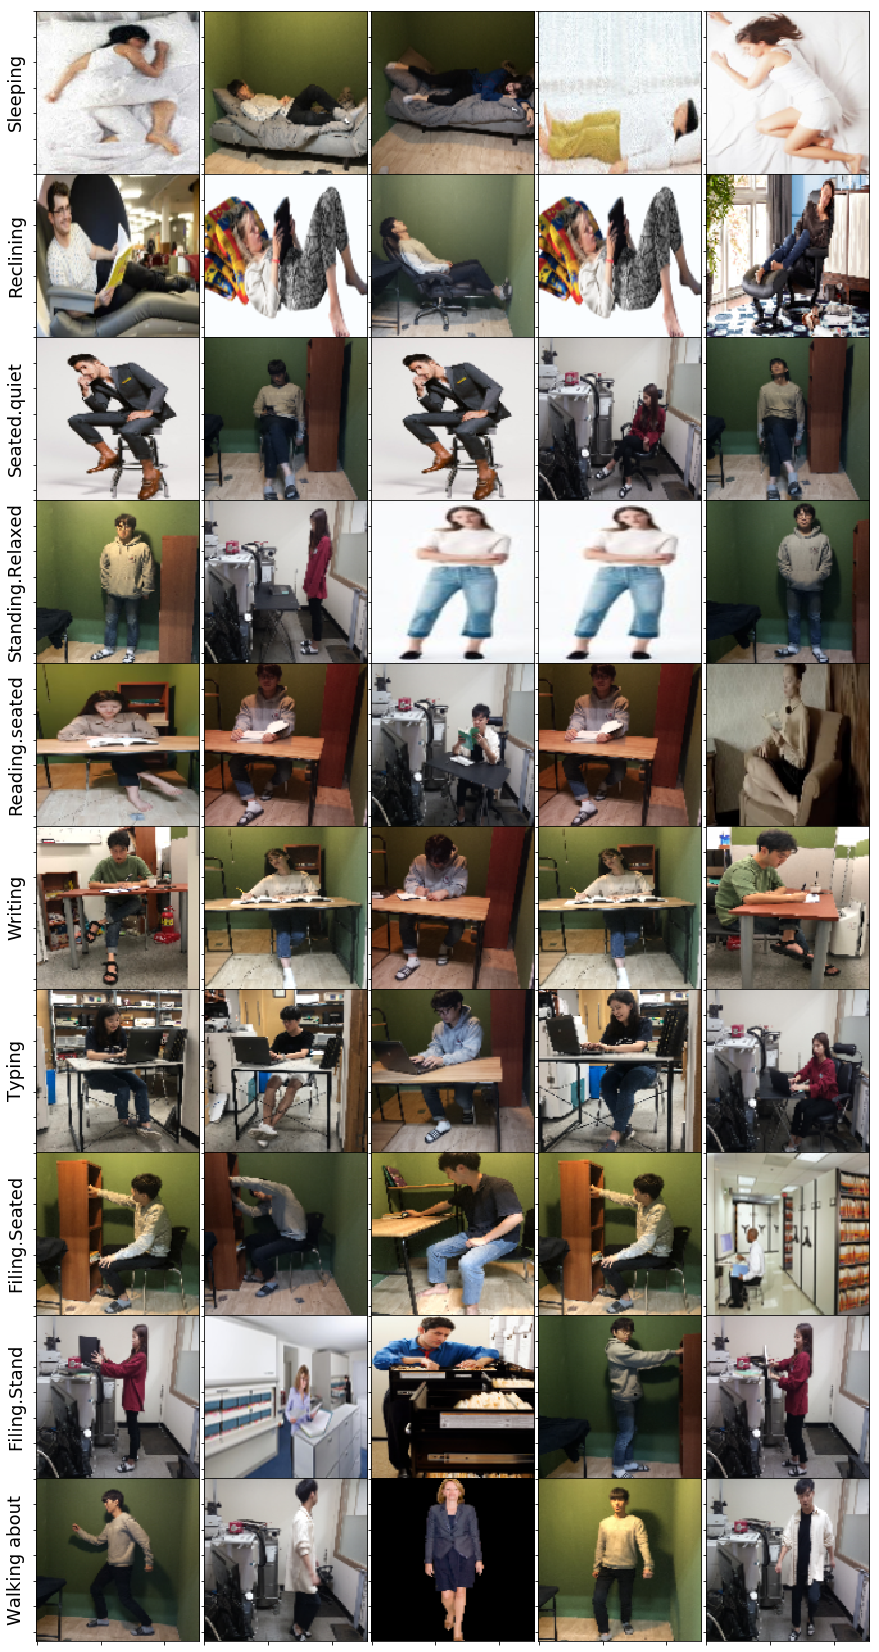

In [3]:
tools.analysis.show_dataset(orig_img_set, test_it.labels.squeeze())

In [4]:
predicted_joints = net.sess.run(
    [net.fc_regression],
    feed_dict={net.x : test_it.img_set, net.keep_prob:1.0, net.is_train: False})[0]

predicted_joints = predicted_joints.reshape(len(predicted_joints),14,2)
pred_canonical = tools.pose.convert2canonical(predicted_joints)
orig_canonical = tools.pose.convert2canonical(test_it.coor_set.reshape(-1,14,2))

In [5]:
tools.analysis.get_pcp_stick_result_table_per_activities(test_it.labels, orig_canonical, pred_canonical)

Sleeping  Reclining  Seated.quiet  Standing.Relaxed  Reading.seated  \
Head       0.67       0.94          0.71              0.82            0.88   
Torso      1.00       0.94          0.94              1.00            0.94   
U Arm      0.76       0.91          0.82              0.85            0.88   
L Arm      0.67       0.76          0.74              0.88            0.74   
U Leg      0.93       0.91          0.85              0.88            0.79   
L Leg      0.90       0.91          0.94              0.94            0.91   
Mean       0.82       0.90          0.83              0.90            0.86   

       Writing  Typing  Filing.Seated  Filing.Stand  Walking about  Average  
Head      0.71    0.94           0.88          0.53           0.82     0.79  
Torso     0.94    0.94           0.94          0.76           0.94     0.94  
U Arm     0.85    0.94           0.91          0.71           0.82     0.84  
L Arm     0.65    0.79           0.88          0.68           0.79     0.76  
U Leg     0.85    0.94           0.94          0.74           0.91     0.88  
L Leg     0.91    0.94           0.91          0.76           0.88     0.90  
Mean      0.82    0.92           0.91          0.70           0.86     0.85

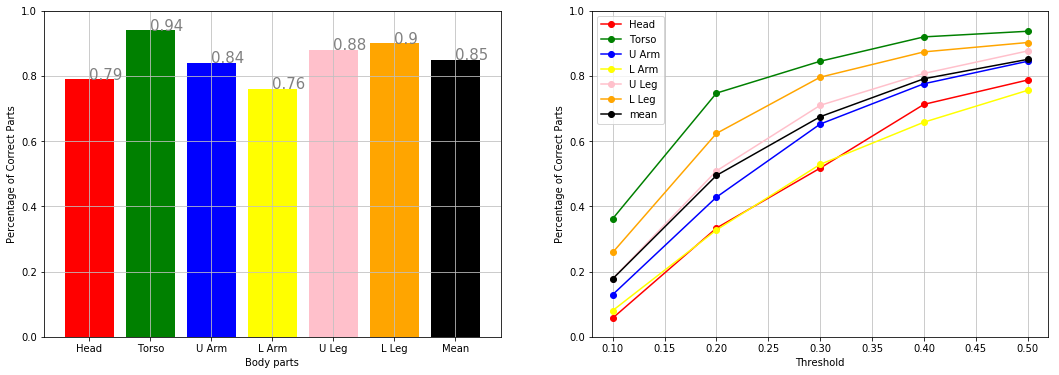

In [6]:
tools.analysis.show_pcp_result_plot_per_sticks(test_it.labels, orig_canonical, pred_canonical)

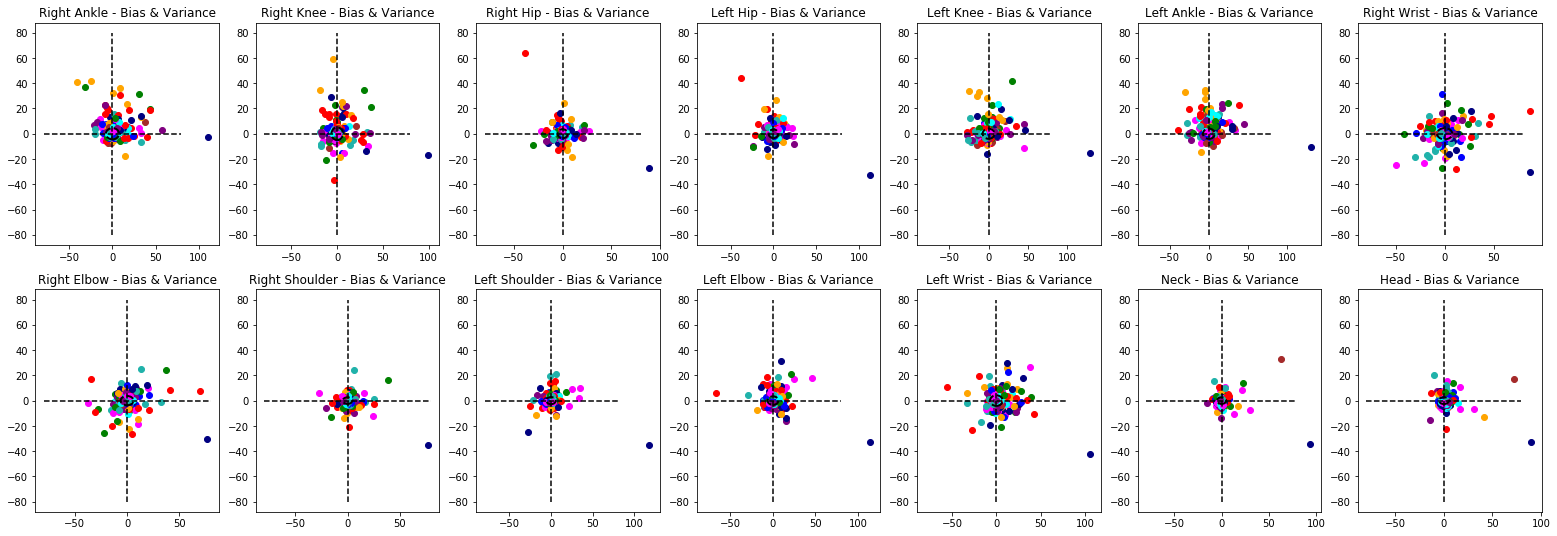

In [7]:
tools.analysis.visualize_Variances_per_joint(test_it.labels, test_it.coor_set, predicted_joints)

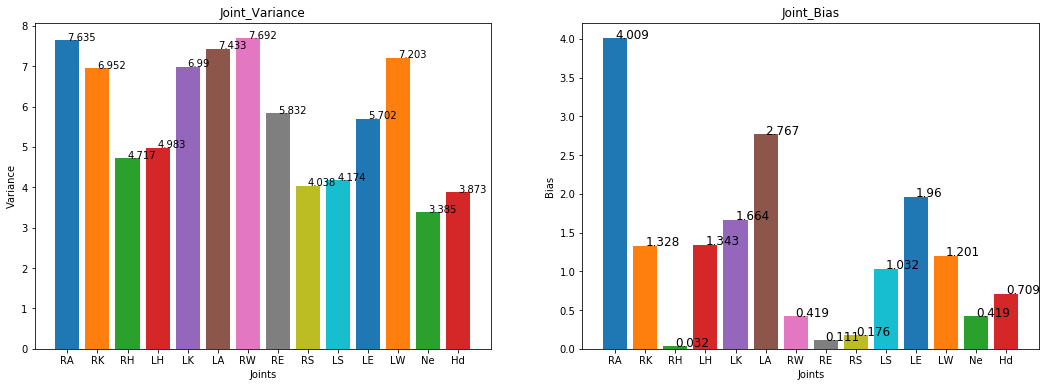

In [8]:
tools.analysis.hist_Variance_Bias_per_joint(test_it.coor_set, predicted_joints)

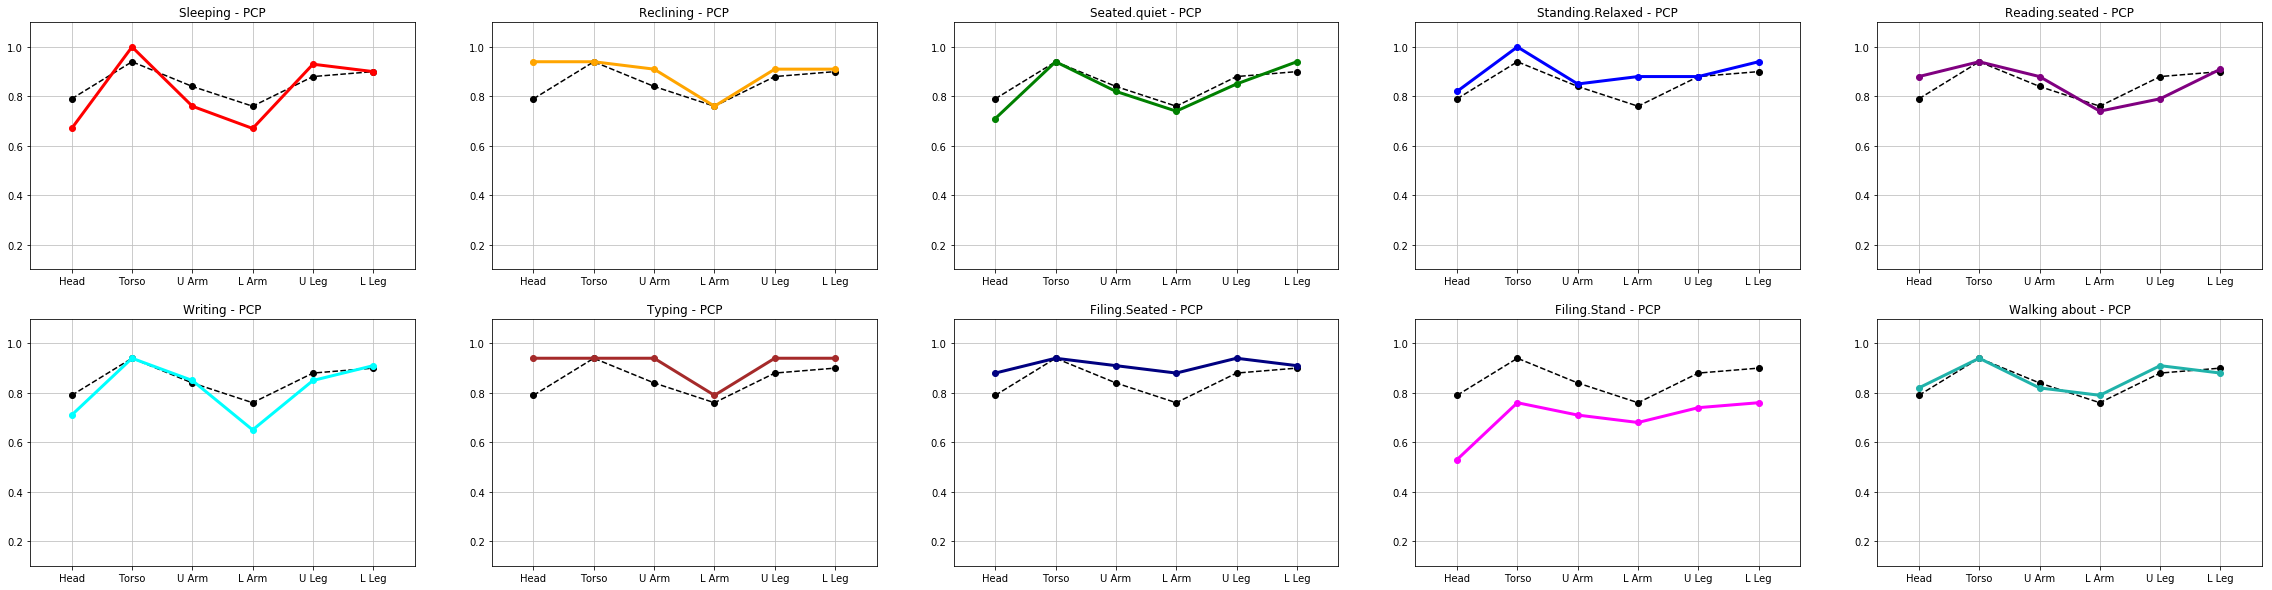

In [9]:
tools.analysis.plot_total_pcp_result(test_it.labels, orig_canonical, pred_canonical)

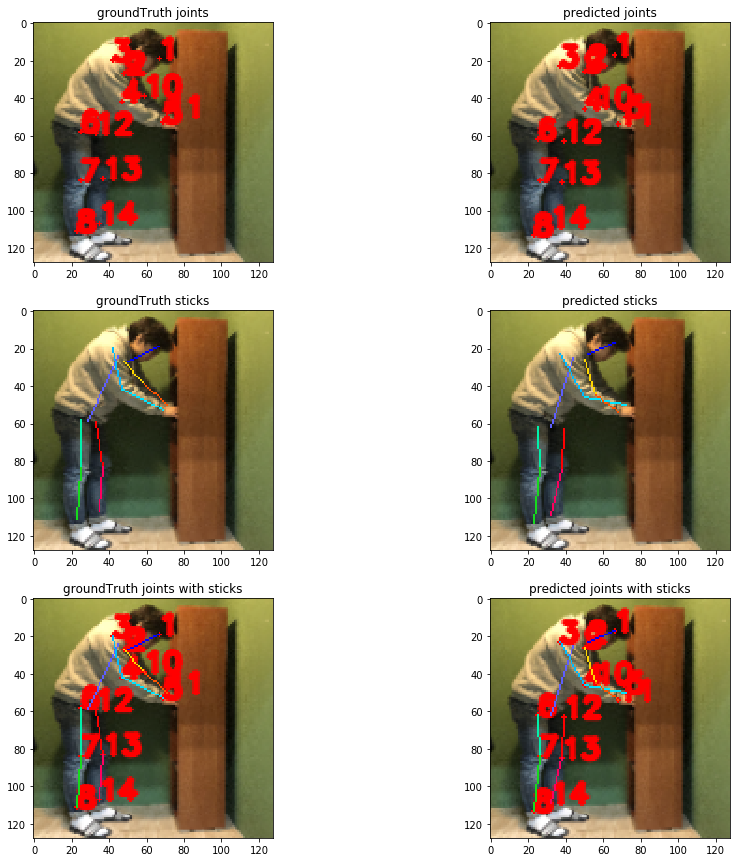

In [10]:
idx=173

tools.analysis.demo_plot(orig_img_set[idx], orig_canonical[idx], pred_canonical[idx])

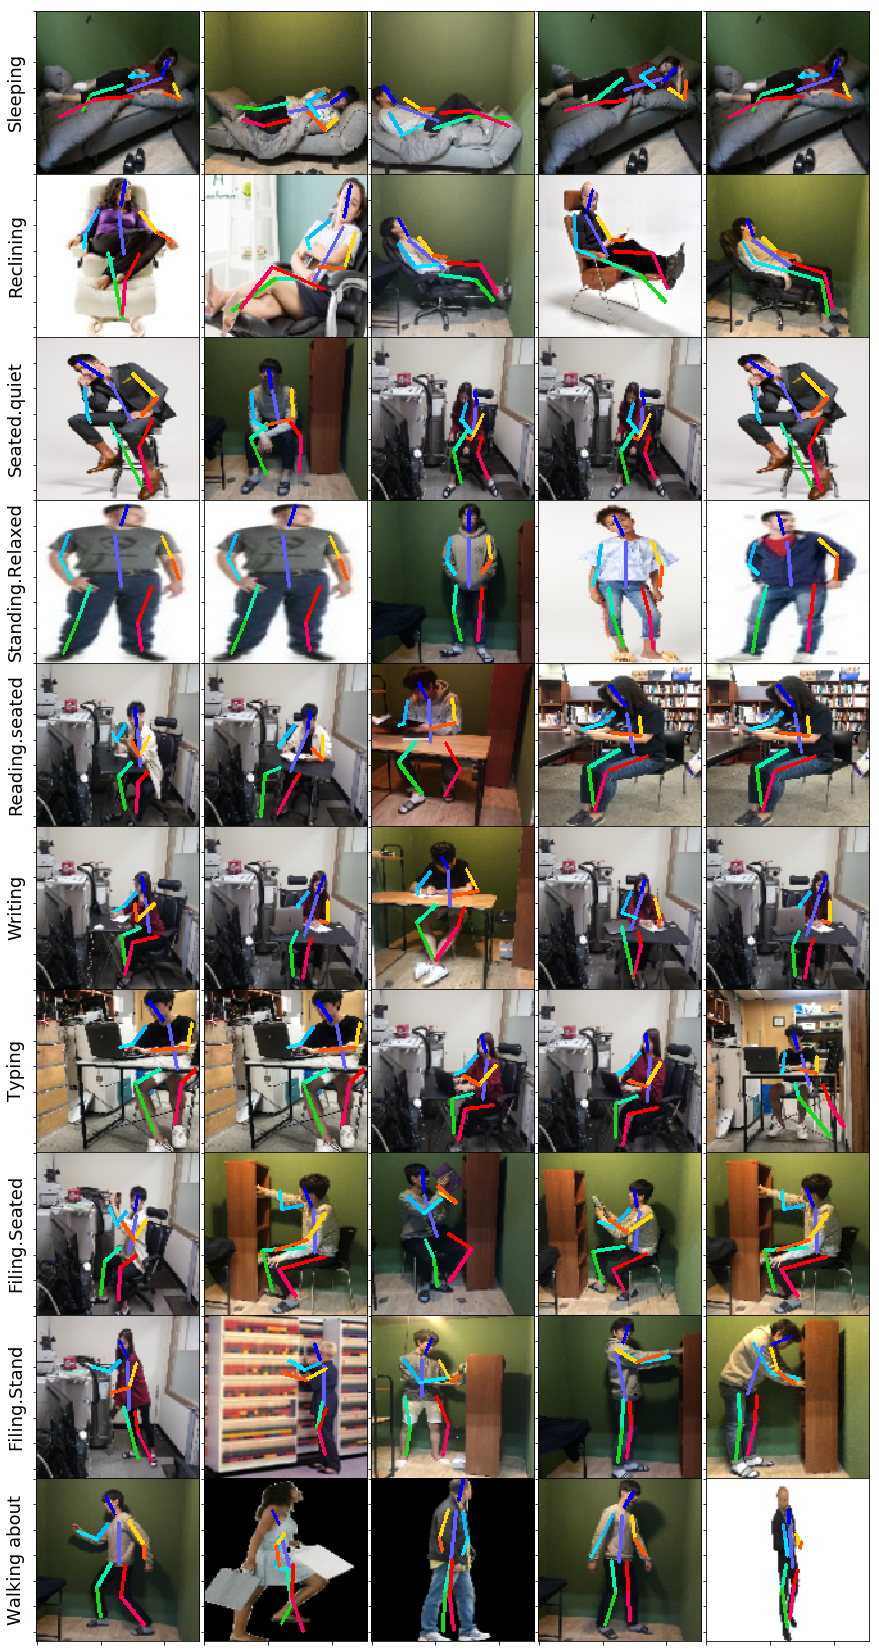

In [11]:
tools.analysis.show_estimated(orig_img_set, test_it.labels.squeeze(), pred_canonical)